# NAME - NISHITA YADAV
# ROLL NO. - 045036
# PGDM ( BDA )- 04 - H

In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
# Import & Read Dataset
data = pd.read_csv('car_prices.csv')

# Display Dataset Information
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19948 entries, 0 to 19947
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          19948 non-null  int64  
 1   make          19893 non-null  object 
 2   model         19892 non-null  object 
 3   trim          19813 non-null  object 
 4   body          19453 non-null  object 
 5   transmission  17809 non-null  object 
 6   vin           19948 non-null  object 
 7   state         19948 non-null  object 
 8   condition     15589 non-null  float64
 9   odometer      19932 non-null  float64
 10  color         19898 non-null  object 
 11  interior      19898 non-null  object 
 12  seller        19948 non-null  object 
 13  mmr           19948 non-null  int64  
 14  sellingprice  19948 non-null  int64  
 15  saledate      19948 non-null  object 
dtypes: float64(2), int64(3), object(11)
memory usage: 2.4+ MB


In [3]:
data.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [10]:

# Sample 5000 random records from the dataset
sampled_data = data.sample(n=5000, random_state=45036)

In [11]:

sampled_data.describe()

,year,condition,odometer,mmr,sellingprice
count,5000.000000,3920.000000,4995.000000,5000.000000,5000.000000
mean,2009.365200,29.542857,78300.544545,12967.880000,12586.844800
std,3.333834,13.253903,53448.057156,9391.954845,9424.968208
min,1986.000000,1.000000,1.000000,175.000000,200.000000
25%,2007.000000,23.000000,36819.000000,6400.000000,6000.000000
50%,2010.000000,33.000000,73179.000000,11150.000000,10750.000000
75%,2011.000000,39.000000,109292.000000,17350.000000,17000.000000
max,2015.000000,49.000000,999999.000000,157000.000000,149800.000000


Data Preprocessing

In [12]:
# Step 1: Handling Missing Values

# Identify numerical and categorical columns
numerical_cols = sampled_data.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = sampled_data.select_dtypes(include=['object']).columns

# Fill missing values
for col in numerical_cols:
    sampled_data[col].fillna(sampled_data[col].median(), inplace=True)

for col in categorical_cols:
    sampled_data[col].fillna(sampled_data[col].mode()[0], inplace=True)

# Step 2: Data Type Correction
# Convert numerical columns to the appropriate type and categorical columns to 'category' type
for col in numerical_cols:
    sampled_data[col] = pd.to_numeric(sampled_data[col], errors='coerce')

for col in categorical_cols:
    sampled_data[col] = sampled_data[col].astype('category')

sampled_data_info = sampled_data.info()

sampled_data_info

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 2641 to 8420
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   year          5000 non-null   int64   
 1   make          5000 non-null   category
 2   model         5000 non-null   category
 3   trim          5000 non-null   category
 4   body          5000 non-null   category
 5   transmission  5000 non-null   category
 6   vin           5000 non-null   category
 7   state         5000 non-null   category
 8   condition     5000 non-null   float64 
 9   odometer      5000 non-null   float64 
 10  color         5000 non-null   category
 11  interior      5000 non-null   category
 12  seller        5000 non-null   category
 13  mmr           5000 non-null   int64   
 14  sellingprice  5000 non-null   int64   
 15  saledate      5000 non-null   category
dtypes: category(11), float64(2), int64(3)
memory usage: 624.6 KB


Unsupervised Learning: Clustering - K-Means {K = 2, 3, 4, 5}

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [13]:
# Split the sampled data into features (X) and target (y)
X = sampled_data.drop('transmission', axis=1)
y = sampled_data['transmission']

# Define numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

# Define the transformers for the numerical and categorical columns
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Create the preprocessor with ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# Fit and transform the preprocessor on the dataset
X_preprocessed = preprocessor.fit_transform(X)

In [14]:
# Identify numerical columns in the dataset
numerical_features = sampled_data.select_dtypes(include=['int64', 'float64']).columns

# Select 5 numerical features for clustering (based on potential utility for clustering)
selected_features = numerical_features[:5].tolist()  # Change this based on feature selection logic

selected_features

['year', 'condition', 'odometer', 'mmr', 'sellingprice']

In [15]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Extract the selected features for clustering
clustering_data = sampled_data[selected_features]

# Standardize the features
scaler = StandardScaler()
clustering_scaled = scaler.fit_transform(clustering_data)

# Perform K-Means clustering with k = 2, 3, 4, 5
k_values = [2, 3, 4, 5]
kmeans_results = {}

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=45036)
    kmeans.fit(clustering_scaled)
    kmeans_results[k] = kmeans.labels_

# Show the first 10 cluster assignments for each k
{k: labels[:10] for k, labels in kmeans_results.items()}

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


{2: array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int32),
 3: array([1, 2, 2, 1, 0, 2, 2, 2, 2, 1], dtype=int32),
 4: array([1, 3, 3, 1, 1, 3, 3, 0, 3, 0], dtype=int32),
 5: array([4, 0, 0, 4, 1, 0, 0, 2, 4, 2], dtype=int32)}

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For k=2, the Silhouette Score is: 0.3603
For k=2, the Davies-Bouldin Score is: 1.0653


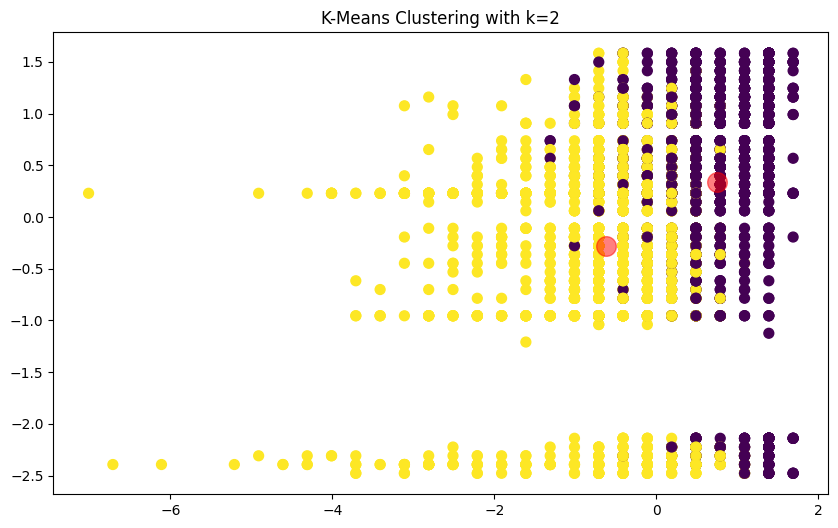

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For k=3, the Silhouette Score is: 0.2892
For k=3, the Davies-Bouldin Score is: 1.1448


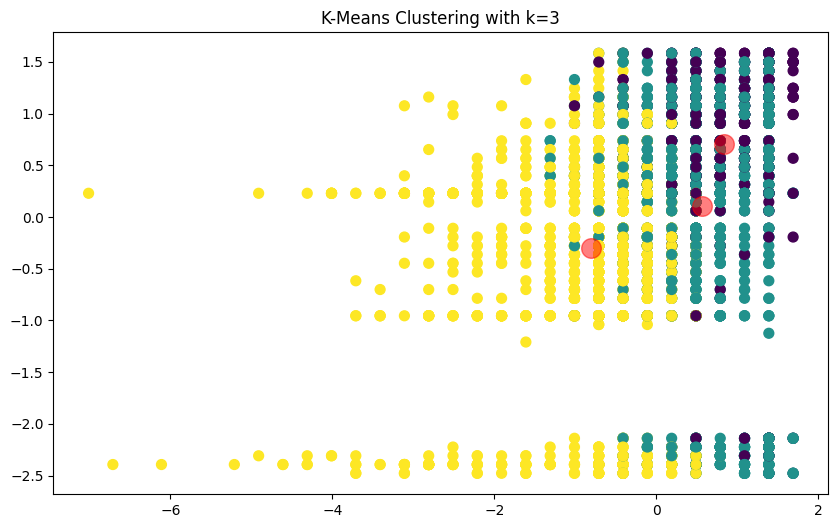

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For k=4, the Silhouette Score is: 0.3286
For k=4, the Davies-Bouldin Score is: 0.9679


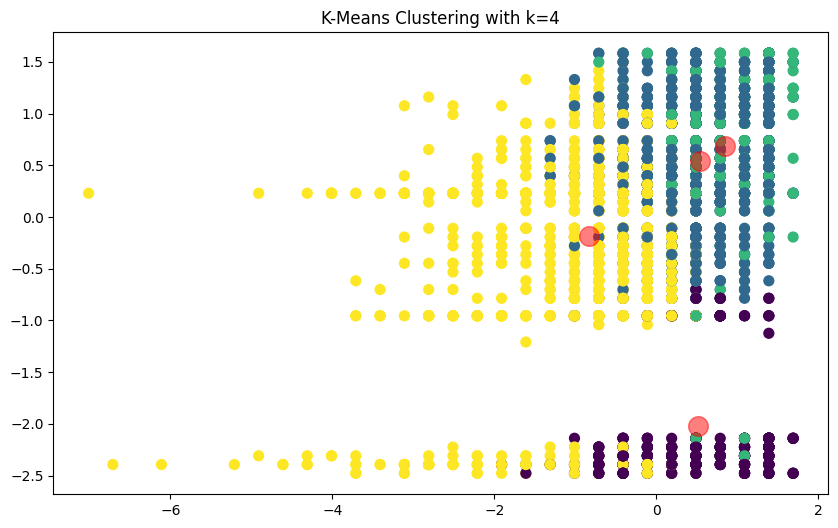

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For k=5, the Silhouette Score is: 0.3098
For k=5, the Davies-Bouldin Score is: 1.0425


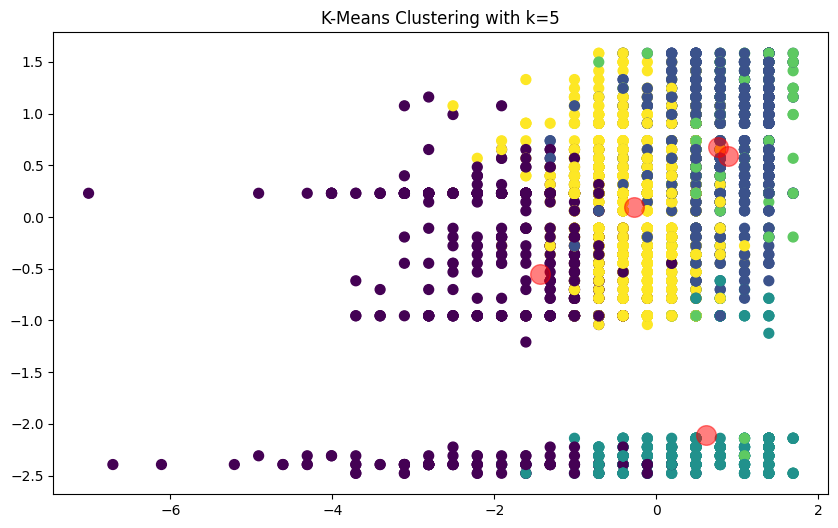

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Define a function to perform clustering and visualize the results
def cluster_and_evaluate(data, k_values):
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=45036)
        labels = kmeans.fit_predict(data)

        # Calculate silhouette and Davies-Bouldin scores
        silhouette_avg = silhouette_score(data, labels)
        davies_bouldin_avg = davies_bouldin_score(data, labels)

        print(f"For k={k}, the Silhouette Score is: {silhouette_avg:.4f}")
        print(f"For k={k}, the Davies-Bouldin Score is: {davies_bouldin_avg:.4f}")

        # Visualize the clusters
        plt.figure(figsize=(10, 6))
        plt.scatter(data[:, 0], data[:, 1], c=labels, s=50, cmap='viridis')
        centers = kmeans.cluster_centers_
        plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
        plt.title(f'K-Means Clustering with k={k}')
        plt.show()

# Run the clustering and evaluation for the defined k values
cluster_and_evaluate(clustering_scaled, k_values)

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import numpy as np

In [22]:
# Split the preprocessed data into training and testing sets with stratified sampling
X_train, X_test, y_train, y_test = train_test_split(
    X_preprocessed, y, test_size=0.20, random_state=45009, stratify=y)


In [23]:
# Initialize the models
decision_tree = DecisionTreeClassifier(random_state=45036)
random_forest = RandomForestClassifier(random_state=45036)

# Train the models
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)

# Predict on the testing set
y_pred_dt = decision_tree.predict(X_test)
y_pred_rf = random_forest.predict(X_test)

# Calculate the metrics
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

# Prepare the results
results = {
    'Decision Tree': {
        'Accuracy': accuracy_dt,
        'Precision': precision_dt,
        'Recall': recall_dt,
        'F1 Score': f1_dt
    },
    'Random Forest': {
        'Accuracy': accuracy_rf,
        'Precision': precision_rf,
        'Recall': recall_rf,
        'F1 Score': f1_rf
    }
}

results

{'Decision Tree': {'Accuracy': 0.916,
  'Precision': 0.9335669289873676,
  'Recall': 0.916,
  'F1 Score': 0.9244954566765645},
 'Random Forest': {'Accuracy': 0.962,
  'Precision': 0.9273333333333332,
  'Recall': 0.962,
  'F1 Score': 0.944348623853211}}

In [28]:
from sklearn.metrics import ConfusionMatrixDisplay

# Function to plot confusion matrix using ConfusionMatrixDisplay
def plot_confusion_matrix_for_model(model, X_test, y_test, title):
    disp = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap=plt.cm.Blues)
    disp.ax_.set_title(f'Confusion Matrix for {title}')
    plt.show()

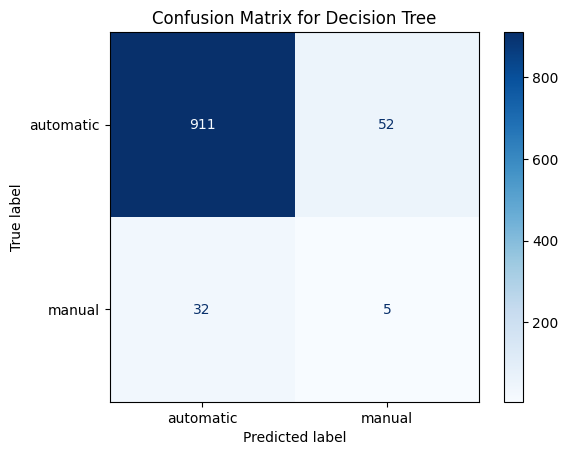

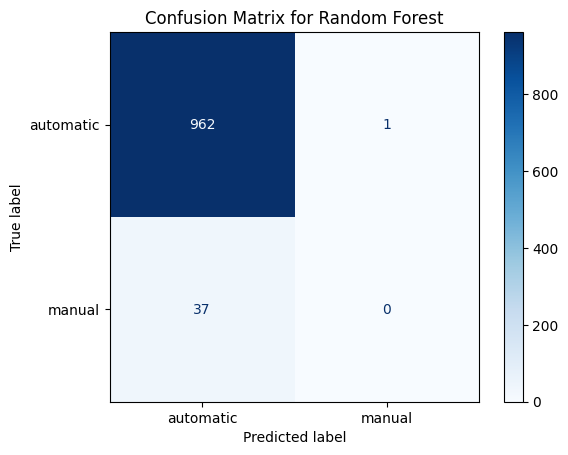

In [29]:
# Plot confusion matrices and ROC curves for both models
plot_confusion_matrix_for_model(decision_tree, X_test, y_test, 'Decision Tree')
plot_confusion_matrix_for_model(random_forest, X_test, y_test, 'Random Forest')

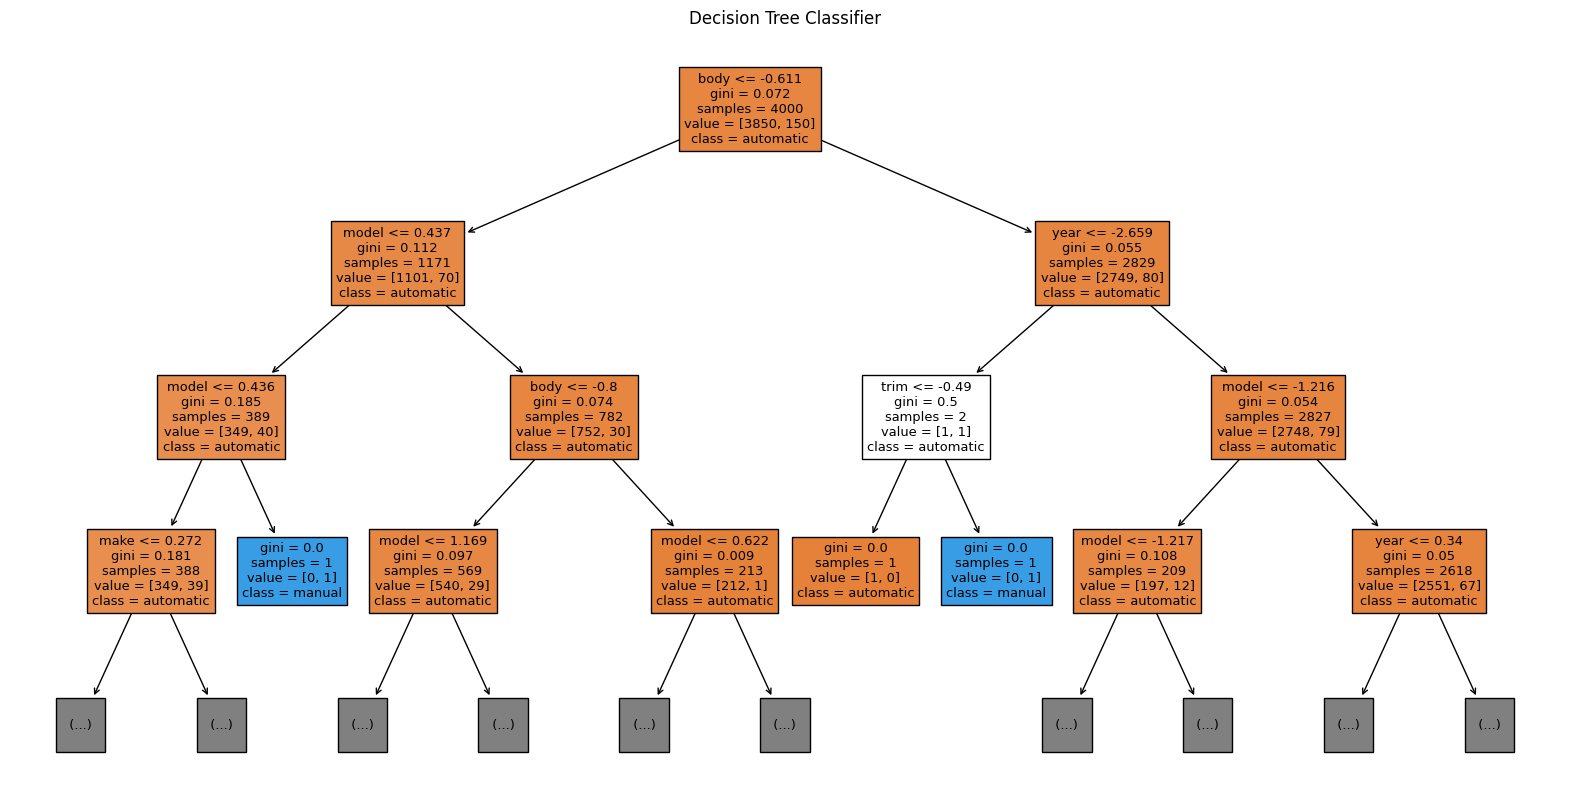

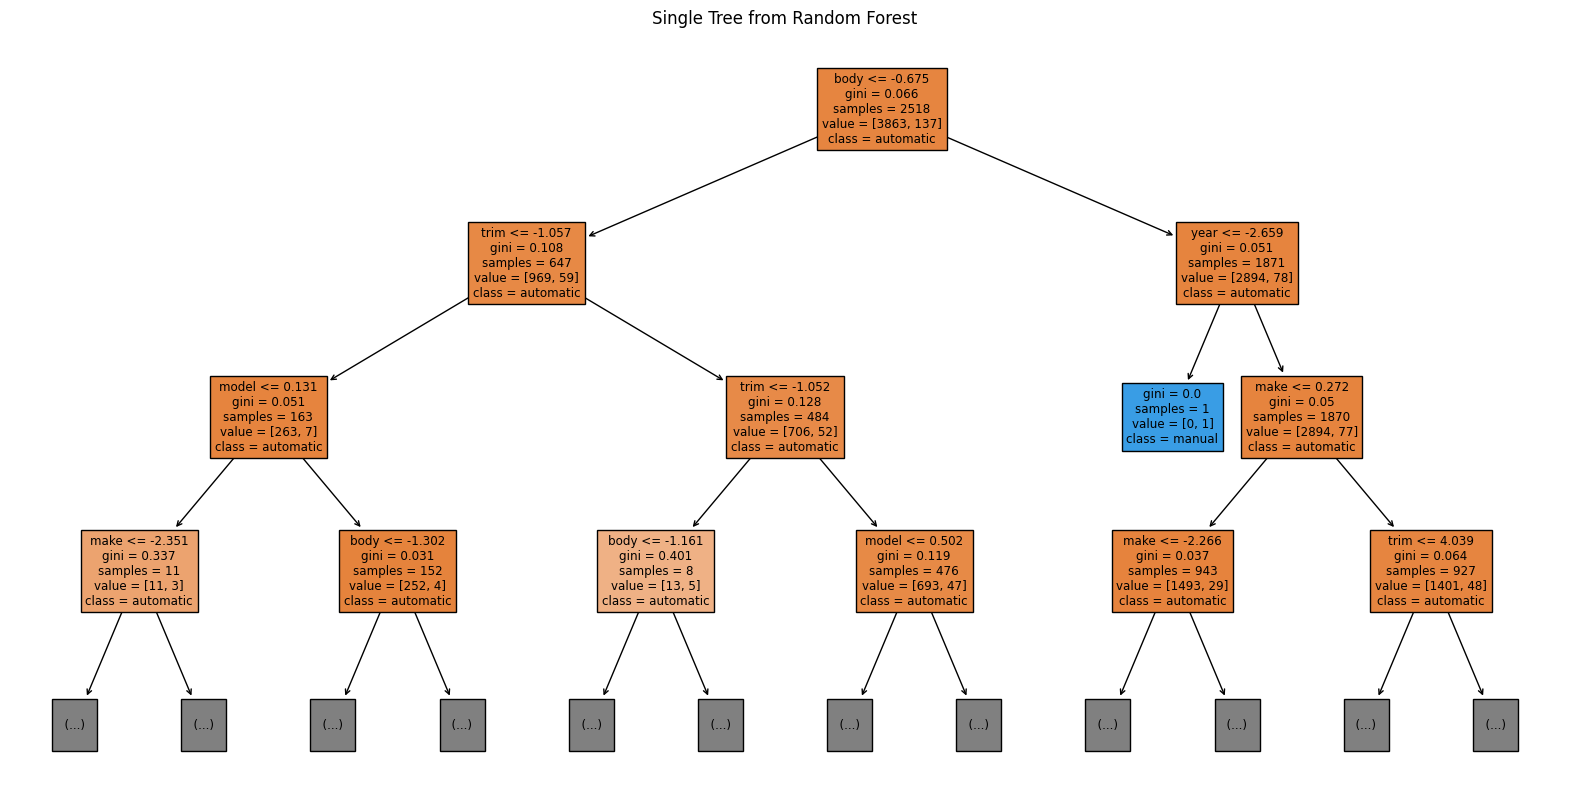

In [43]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assume X_train is defined in your notebook and contains the feature names
features = X_train.columns.tolist()  # Make sure X_train is your feature DataFrame

# Plot the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(decision_tree, filled=True, feature_names=features, class_names=decision_tree.classes_, max_depth=3)
plt.title("Decision Tree Classifier")
plt.show()

# Plot a single tree from the Random Forest
plt.figure(figsize=(20, 10))
rf_tree = random_forest.estimators_[0]  # Select the first tree in the Random Forest
plot_tree(rf_tree, filled=True, feature_names=features, class_names=random_forest.classes_, max_depth=3)
plt.title("Single Tree from Random Forest")
plt.show()
